![4.png](./img/practica7/4.png)

**(a)**
> **Estimadores** de:
> * Momentos
> * Máxima Verosimilitud
> * 90-percentil
>
> https://imgur.com/gallery/mIRQp0C

**(b) (c)**

> * Insesgados?
> * Consistentes?
>
> https://imgur.com/gallery/f2SJ96Z

**(d)**

In [1]:
X <- c( 39.08, 45.27,  26.27, 14.77, 65.84,
        49.64,  0.80,  66.58, 69.60, 32.42,
       228.36, 64.79,   9.38,  3.86, 37.18,
       104.75,  3.64, 104.19,  8.17,  8.36)
head(X)

[1] 39.08 45.27 26.27 14.77 65.84 49.64

In [1]:
# Estimador de Momentos
estimadorMomentos <- function(x){
    return (1/mean(x))
}

In [7]:
theta_m <- estimadorMomentos(X)
theta_m

[1] 0.02034691

In [12]:
# Estimador de Maxima Verosimilitud (igual al de momentos)
estimadorMV <- function(x){
    return (1/mean(x))
}

In [13]:
theta_MV <- estimadorMV(X)
theta_MV

[1] 0.02034691

### **Percentil 90** : usando modelo

Lo escribo porque estuvo bueno:

Si

$$X_i \sim \mathcal{E}(\theta) $$

Con densidad (PDF):

$$f_X(x) = \theta e^{-\theta x}$$

Y Distribución (CDF): 

$$F(X < k) = 1-e^{-\theta k}$$

Quiero que esta probabilidad sea del 90%

$$1-e^{-\theta k} = 0.9$$


$$e^{-\theta k} = 0.1$$


$$log(e^{-\theta k}) = log(0.1)$$


$$-\theta k = log(0.1)$$


$$k = - \frac {log(0.1)}{\theta}$$

Donde por procedimiento *Plug-in*, podemos utilizar el estimador de Momentos o M.V. de $\theta$

$$\hat k_m = - \frac {log(0.1)}{\theta_m}$$


$$\hat k_m = - \frac {log(0.1)}{\frac 1 {\bar X}}$$

| Estimador de 90 percentil |
|---|
|$$\huge \hat k_m = - log(0.1) \ \bar X$$|

In [36]:
# Percentil 90 usando modelo
estimadorPercentil90 <- function(theta_hat){
    return (-log(0.1)/theta_hat)
}

k_hat <- estimadorPercentil90(theta_m)
k_hat

[1] 113.1663

### **Percentil 90** : Sin modelo

Usando el hecho de que ***si ordeno los datos puedo extraer el número en la posición correspondiente al 90% del total***.

* Ej: Si hay **10 elementos ordenados**, **el noveno** corresponderá al **90 percentil**, pues es mayor o igual que el 90% de los datos.

**Observación:** En caso de **no** obtener un valor **entero**, debe redondearse **hacia arriba**.

In [37]:
# Percentil 90
sort(X)

[1]   0.80   3.64   3.86   8.17   8.36   9.38  14.77  26.27  32.42  37.18
[11]  39.08  45.27  49.64  64.79  65.84  66.58  69.60 104.19 104.75 228.36

In [38]:
# Cantidad de datos
length(X)

[1] 20

In [39]:
# 90% de los datos (redondeo hacia arriba)
ceiling(length(X)*0.9)

[1] 18

In [40]:
# Elemento en el índice que corresponde al 90 percentil
sort(X)[ceiling(length(X)*0.9)]

[1] 104.19

Lo que es aceptablemente cercano al valor calculado usando el modelo Exponencial:

In [41]:
k_hat

[1] 113.1663

# Usando datos de la materia

In [42]:
data_n5 <- read.csv("./data/practica7/datos_Practica7_ej4_n_5.csv")
data_n50 <- read.csv("./data/practica7/datos_Practica7_ej4_n_50.csv")
data_n100 <- read.csv("./data/practica7/datos_Practica7_ej4_n_100.csv")
head(data_n100)

lamparas
4.1889362
0.4398173
1.3663653
8.3793087
1.7733742
5.9061234


In [45]:
theta_m_n5 <- estimadorMomentos(data_n5$lamparas)
theta_m_n50 <- estimadorMomentos(data_n50$lamparas)
theta_m_n100 <- estimadorMomentos(data_n100$lamparas)
theta_m_n5
theta_m_n50
theta_m_n100

[1] 0.3096397

[1] 0.2230661

[1] 0.2634718

In [47]:
# 90 percentil con modelo
k_hat_n5 <- estimadorPercentil90(theta_m_n5)
k_hat_n50 <- estimadorPercentil90(theta_m_n50)
k_hat_n100 <- estimadorPercentil90(theta_m_n100)
k_hat_n5
k_hat_n50
k_hat_n100

[1] 7.436337

[1] 10.32243

[1] 8.739398

In [49]:
# 90 percentil sin modelo
sort(data_n5$lamparas)[ceiling(length(data_n5$lamparas)*0.9)]
sort(data_n50$lamparas)[ceiling(length(data_n50$lamparas)*0.9)]
sort(data_n100$lamparas)[ceiling(length(data_n100$lamparas)*0.9)]

[1] 8.379309

[1] 9.613947

[1] 8.379309

# Plots

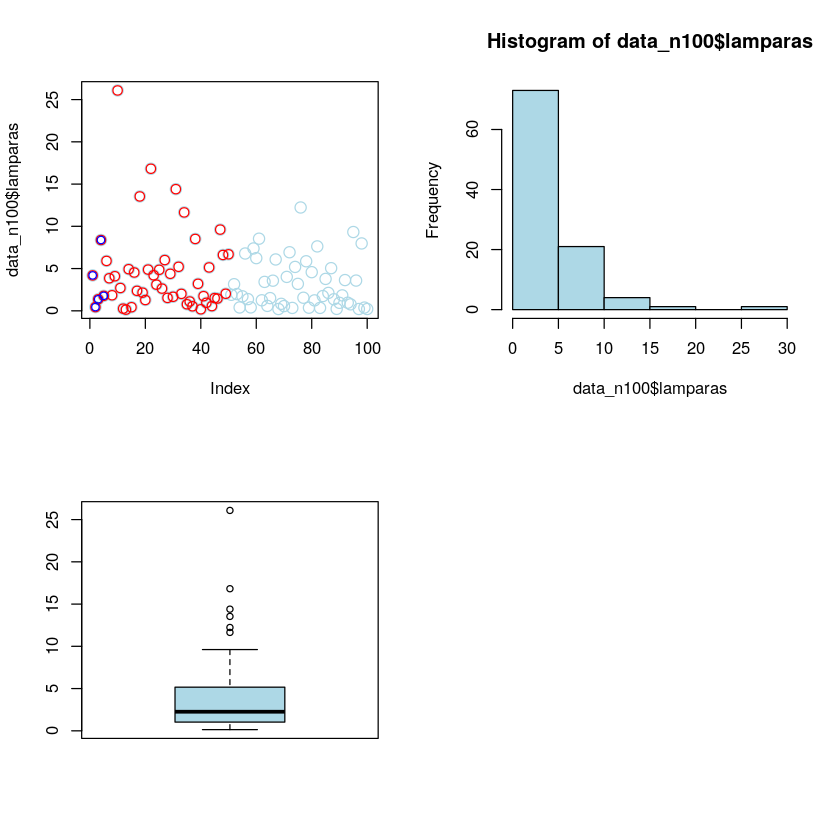

In [53]:
par(mfrow=c(2,2))
plot(data_n100$lamparas, col="lightblue", cex=1.5)
points(data_n50$lamparas, col="red", cex=1.25)
points(data_n5$lamparas, col="blue")

hist(data_n100$lamparas, col="lightblue")

boxplot(data_n100$lamparas, col="lightblue")